In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from seql import mc, utils

In [3]:
transition = pd.DataFrame(columns=['^', 'A', 'B', 'AB', 'BA', 'AA', 'BB'], 
                          index=['A', 'B', 'AB', 'BA', 'AA', 'BB'])
transition['^']['A'] = 0.49
transition['^']['B'] = 0.51

transition['A']['AB'] = 0.4
transition['A']['AA'] = 0.6
transition['B']['BA'] = 0.6
transition['B']['BB'] = 0.4


transition['AA']['AA'] = 0.1
transition['AA']['AB'] = 0.9

transition['BA']['AA'] = 0.4
transition['BA']['AB'] = 0.6

transition['AB']['BA'] = 0.7
transition['AB']['BB'] = 0.3

transition['BB']['BA'] = 0.7
transition['BB']['BB'] = 0.3
transition.fillna(0, inplace=True)

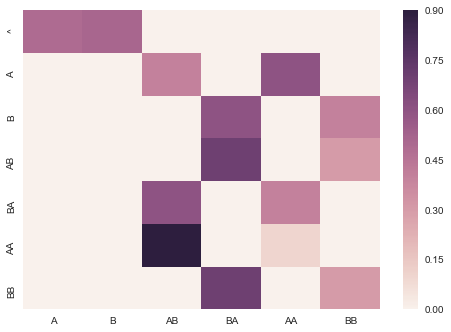

In [4]:
sns.heatmap(transition.T)

In [5]:
def generate_sequence(transition, length):
    seq = []
    for i in range(length):
        if i == 0:
            state = '^'
        elif i == 1:
            state = seq[0]
        else:
            state = ''.join(seq[(i-2):i])
        probas = transition.ix[state]
        probas = probas[probas>0]
        if rand() < probas.max():
            seq.append(probas.idxmax()[-1])
        else:
            
            seq.append(probas.idxmin()[-1])
                
    return seq

In [6]:
def generate_df(sequence, centers, dim=3):
    states = transition.columns
    rnd_data = randn(len(sequence), dim)
    df = pd.DataFrame(index=range(len(sequence)), columns=range(dim))
    for i in range(len(sequence)):
        if i == 0:
            state = sequence[0]
        else:
            state = ''.join(sequence[(i-1):(i+1)])
        df.ix[i] = array(rnd_data[i]) + array(centers[state])
    df['symbol'] = sequence
    return df

In [7]:
dim = 3
centers = {state: rand(dim)*5 for state in transition.index}

sequences = [generate_df(generate_sequence(transition.T, randint(10,30)), centers, dim) for i in range(10)]
for i, seq in enumerate(sequences):
    seq['seq_id'] = i

In [8]:
df = pd.concat(sequences)

In [9]:
df.head()

,0,1,2,symbol,seq_id
0,2.09457,2.55038,1.43147,A,0
1,3.84307,5.65242,0.625841,A,0
2,4.60646,3.38977,3.15975,B,0
3,0.958062,1.08134,2.2966,B,0
4,2.52397,4.46023,3.19401,A,0


In [10]:
model = mc.MarkovChainModel(DecisionTreeClassifier(), 
                            target_label='symbol', sequence_split_label='seq_id', max_state_length=2)

In [11]:
model.fit(df)

^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
^
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A


MarkovChainModel(base_estimator=CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
            cv=3, method='sigmoid'),
         max_state_length=2, min_support=None,
         sequence_split_label='seq_id', target_label='symbol')

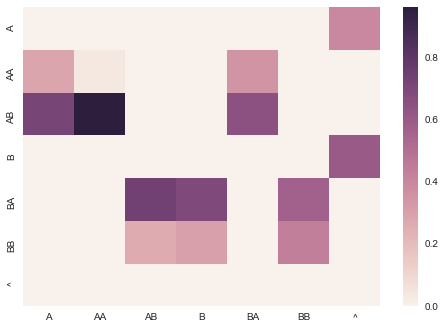

In [12]:
sns.heatmap(model.transition_matrix.T)

In [13]:
model.transition_matrix.T

,A,AA,AB,B,BA,BB,^
A,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.6
AA,0.315789,0.068966,0.000000,0.00,0.4,0.000000,0.0
AB,0.684211,0.931034,0.000000,0.00,0.6,0.000000,0.0
B,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.4
BA,0.000000,0.000000,0.725806,0.75,0.0,0.833333,0.0
BB,0.000000,0.000000,0.274194,0.25,0.0,0.166667,0.0
^,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0


In [14]:
transition.T

,A,B,AB,BA,AA,BB
^,0.49,0.51,0.0,0.0,0.0,0.0
A,0.00,0.00,0.4,0.0,0.6,0.0
B,0.00,0.00,0.0,0.6,0.0,0.4
AB,0.00,0.00,0.0,0.7,0.0,0.3
BA,0.00,0.00,0.6,0.0,0.4,0.0
AA,0.00,0.00,0.9,0.0,0.1,0.0
BB,0.00,0.00,0.0,0.7,0.0,0.3


In [16]:
print(model.suffix_tree.render())

SuffixTree('/root', count=19585)
├── Node('/root/B', count=9693)
│   ├── Node('/root/B/BB', count=2843)
│   └── Node('/root/B/AB', count=6363)
└── Node('/root/A', count=9892)
    ├── Node('/root/A/AA', count=3032)
    └── Node('/root/A/BA', count=6347)


In [79]:
sequences = [df[model.target_label][df[model.sequence_split_label] == val]
                     for val in df[model.sequence_split_label].unique()]

In [89]:
states = ['A', 'B', 'AB', 'AA', 'BA', 'BB',  'AAA', 'ABA', 'AAB', 'ABB', 'BBB','BBA', 'BAA', 'BAB']
trans = pd.DataFrame(columns=states, index=states)
trans.fillna(0, inplace=True)

In [84]:
import networkx as nx

In [85]:
g = nx.DiGraph()
g.add_edges_from()

In [90]:
for seq in sequences:
    for state_len in [1,2,3]:
        for i in range(len(seq)-state_len):
            prev = ''.join(seq[i:(i+state_len)].values)
            print(prev, end='|')
            for nxt_state_len in [3,2,1]:
                if nxt_state_len > state_len:
                    nxt = ''.join(seq[(i+1-state_len):(i+nxt_state_len+1-state_len)])
                else:
                    nxt = ''.join(seq[(i+1):(i+nxt_state_len+1)])
                if nxt in trans.columns:
                    break
            print(nxt)
            trans.ix[prev][nxt] += 1

A|ABA
B|BAA
A|AAA
A|AAB
A|ABB
B|BBA
B|BAA
A|AAB
A|ABA
B|BAA
A|AAA
A|AAA
A|AAB
A|ABA
B|BAA
A|AAB
A|ABA
B|BAA
A|AAB
A|ABA
B|BAB
A|ABA
B|BAB
A|ABA
B|BAB
A|ABA
B|BAB
A|AB
AB|BA
BA|ABA
AA|BAA
AA|AAA
AB|AAB
BB|ABB
BA|BBA
AA|BAA
AB|AAB
BA|ABA
AA|BAA
AA|AAA
AA|AAA
AB|AAB
BA|ABA
AA|BAA
AB|AAB
BA|ABA
AA|BAA
AB|AAB
BA|ABA
AB|BAB
BA|ABA
AB|BAB
BA|ABA
AB|BAB
BA|ABA
ABA|BAA
BAA|AAA
AAA|AAB
AAB|ABB
ABB|BBA
BBA|BAA
BAA|AAB
AAB|ABA
ABA|BAA
BAA|AAA
AAA|AAA
AAA|AAB
AAB|ABA
ABA|BAA
BAA|AAB
AAB|ABA
ABA|BAA
BAA|AAB
AAB|ABA
ABA|BAB
BAB|ABA
ABA|BAB
BAB|ABA
ABA|BAB
BAB|ABA
ABA|BAB
B|BBB
B|BBB
B|BBA
B|BAB
A|ABB
B|BBA
B|BAB
A|ABA
B|BAA
A|AAB
A|ABB
B|BBB
B|BBA
B|BAB
A|AB
BB|BB
BB|BBB
BB|BBB
BA|BBA
AB|BAB
BB|ABB
BA|BBA
AB|BAB
BA|ABA
AA|BAA
AB|AAB
BB|ABB
BB|BBB
BA|BBA
BBB|BBB
BBB|BBA
BBA|BAB
BAB|ABB
ABB|BBA
BBA|BAB
BAB|ABA
ABA|BAA
BAA|AAB
AAB|ABB
ABB|BBB
BBB|BBA
BBA|BAB
B|BBA
B|BAB
A|ABB
B|BBA
B|BAA
A|AAB
A|ABA
B|BAB
A|ABA
B|BAA
A|AAB
A|ABA
B|BAB
A|ABA
B|BAA
A|AAB
A|AB
BB|BA
BA|BBA
AB|BAB
BB|ABB
BA|BBA
AA|BAA
AB|AA

In [91]:
for state in states:
    trans.ix[state] /= trans.ix[state].sum()

In [92]:
trans

,A,B,AB,AA,BA,BB,AAA,ABA,AAB,ABB,BBB,BBA,BAA,BAB
A,0.0,0.0,0.057692,0.019231,0.000000,0.000000,0.057692,0.442308,0.307692,0.115385,0.000000,0.000000,0.000000,0.000000
B,0.0,0.0,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.093023,0.186047,0.348837,0.348837
AB,0.0,0.0,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.517241,0.000000,0.000000,0.000000,0.000000,0.448276
AA,0.0,0.0,0.105263,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.736842,0.000000
BA,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000
BB,0.0,0.0,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000,0.000000,0.000000
AAA,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000
ABA,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545455,0.454545
AAB,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
ABB,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000


In [100]:
for k, v in trans.iterkv():
    for k1, v1 in v.iterkv():
        print(k, k1, v1)
    break

A A 0.0
A B 0.0
A AB 0.0
A AA 0.0
A BA 0.0
A BB 0.0
A AAA 0.0
A ABA 0.0
A AAB 0.0
A ABB 0.0
A BBB 0.0
A BBA 0.0
A BAA 0.0
A BAB 0.0


/Users/epave/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.
  if __name__ == '__main__':
/Users/epave/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.
  from ipykernel import kernelapp as app


In [ ]:
# find other metrics for matrix similarity
norm(model.transition_matrix.T - transition.T) / norm(transition.T)

In [ ]:
new_sequences = [generate_df(generate_sequence(transition.T, randint(10,30)), centers, dim) for i in range(1)]

In [ ]:
last, states = model.query(new_sequences[0].iloc[:,:3], return_states_history=True)

In [ ]:
''.join(val[-1] for val in states.values[2:])

In [ ]:
''.join(new_sequences[0].symbol.values[2:])